## Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,Measure accuracy of your model using different kernels such as rbf and linear.Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score.Used 80% of samples as training data size

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

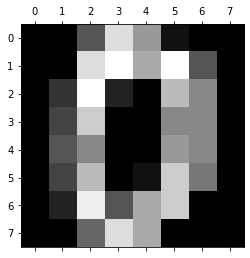

In [3]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df['target'] = digits.target
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Data Visualization

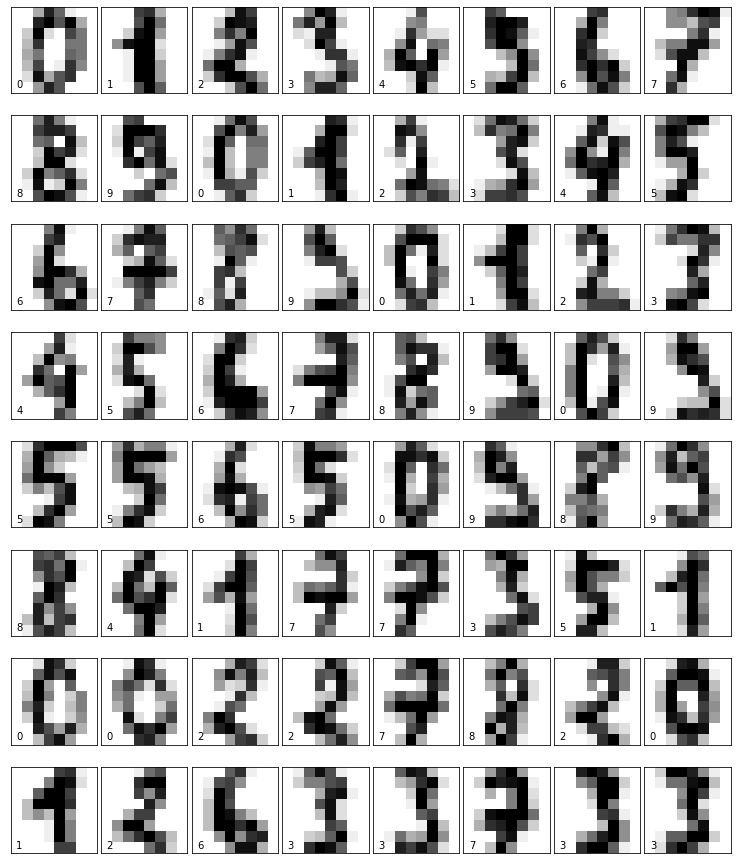

In [11]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

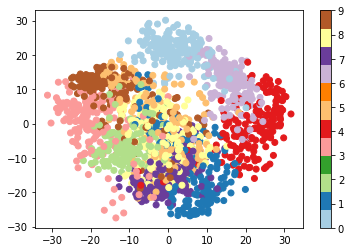

In [12]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

<AxesSubplot:>

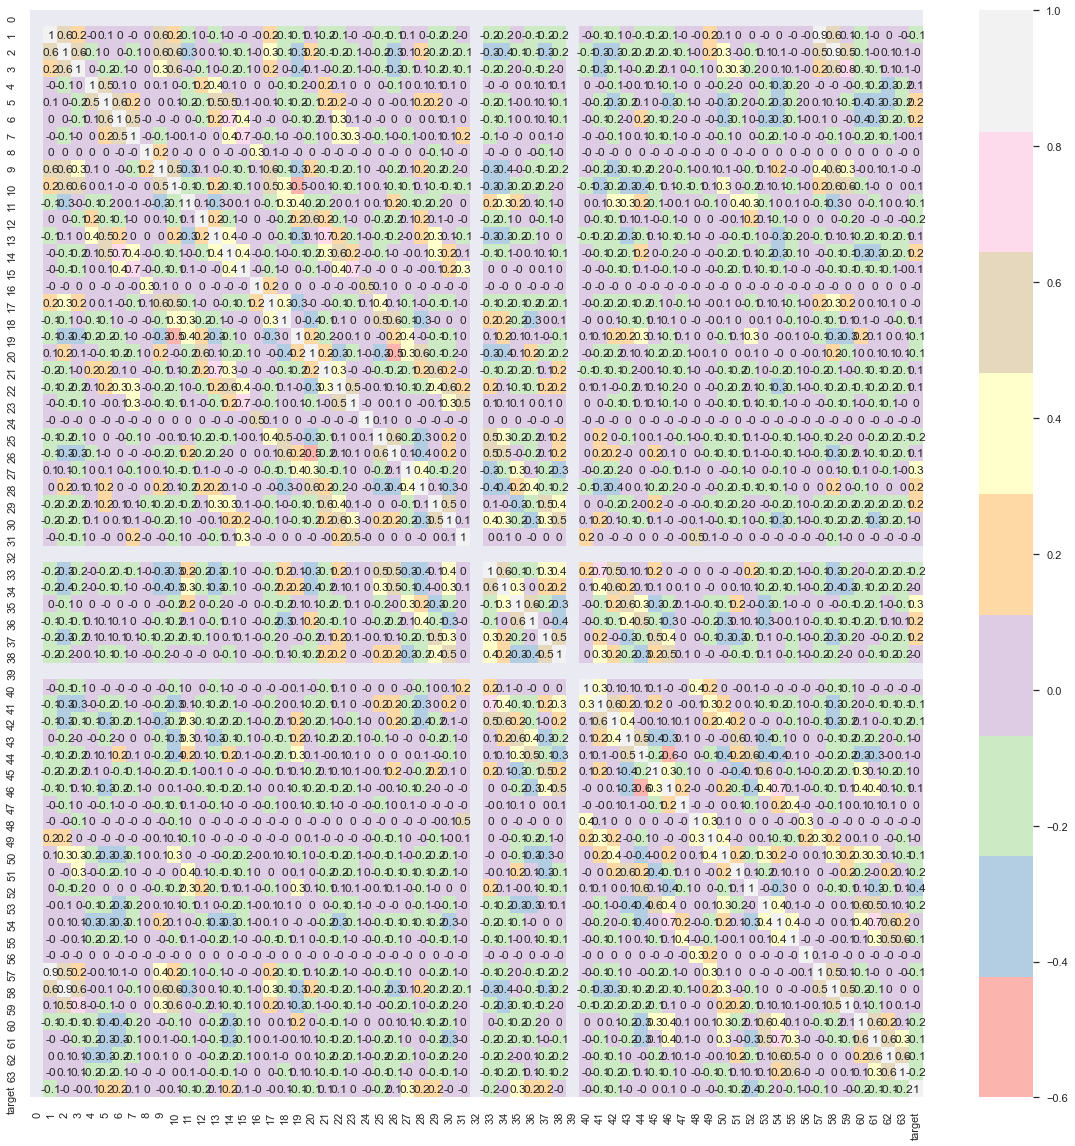

In [107]:
sns.set(rc={'figure.figsize':(20,20)})
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True,cmap='Pastel1')

## Data Preprocessing

In [14]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64

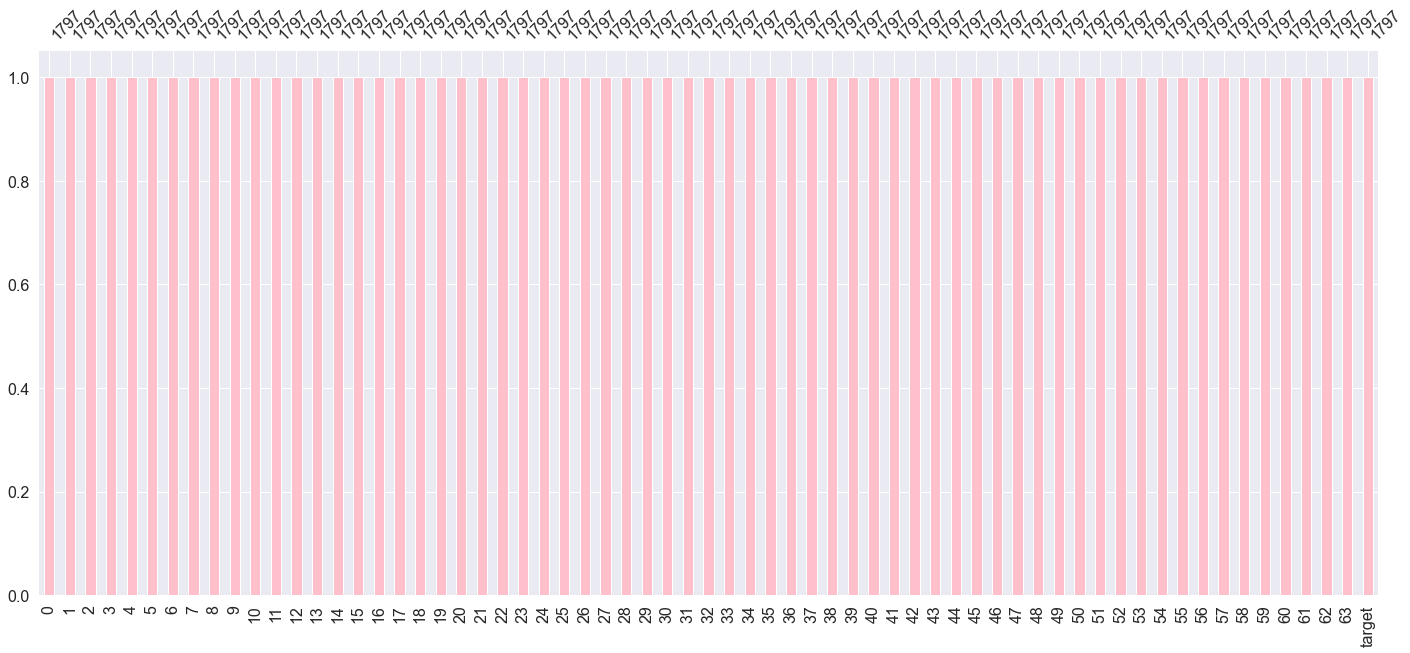

In [18]:
import missingno as msno
msno.bar(df,color="pink")
plt.show()


## Modeling with SVM

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [49]:
X=df.drop('target',axis='columns')
y=df.target

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## rbf Kernal

In [132]:
rbf_model = SVC(kernel='rbf',gamma=0.002,probability=True)
rbf_model.fit(X_train,y_train)

SVC(gamma=0.002, probability=True)

In [133]:
rbf_model.score(X_test,y_test)

0.9861111111111112

In [134]:
y_pred=rbf_model.predict(X_test)

In [135]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

print(accuracy_score(y_test, y_pred))

0.9861111111111112


In [136]:
print(recall_score(y_test, y_pred,average=None))

[1.         1.         1.         0.97058824 1.         0.9787234
 1.         0.97058824 1.         0.95      ]


In [137]:
print(precision_score(y_test, y_pred,average=None))

[1.         1.         1.         1.         1.         0.95833333
 0.97222222 0.97058824 1.         0.97435897]


## ROC Curve

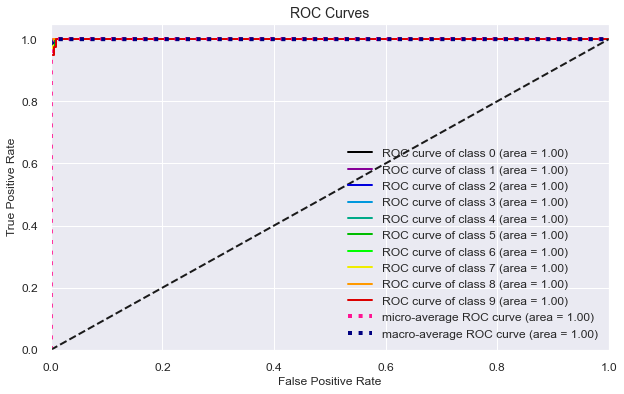

In [142]:
y_probas = rbf_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()


## Precision Recall Curve

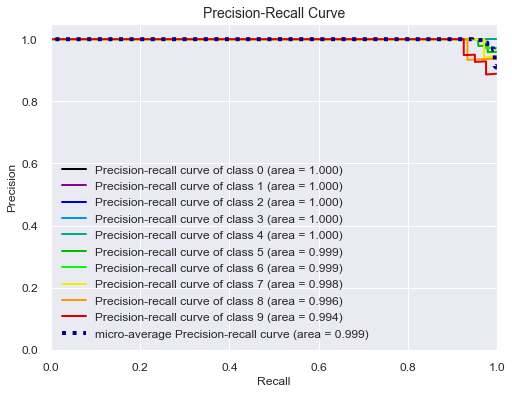

In [139]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(8,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Learning Curve

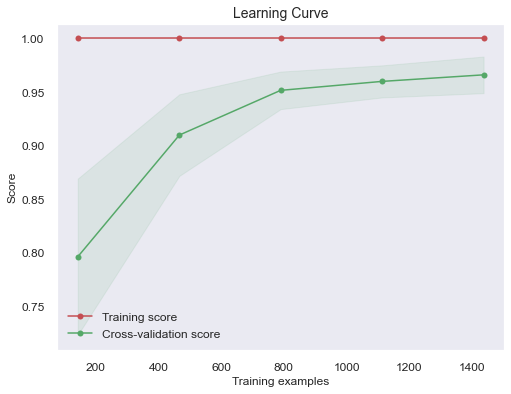

In [140]:
skplt.estimators.plot_learning_curve(rbf_model, X,y,figsize=(8,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Confusion matrix

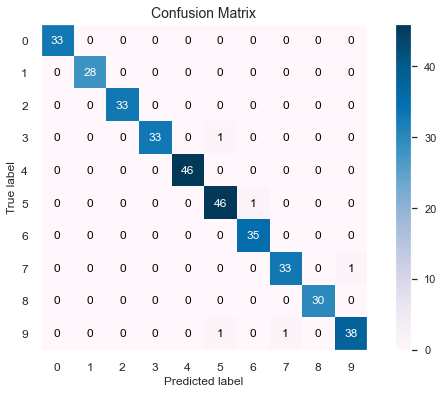

In [146]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.PuBu)
plt.show()


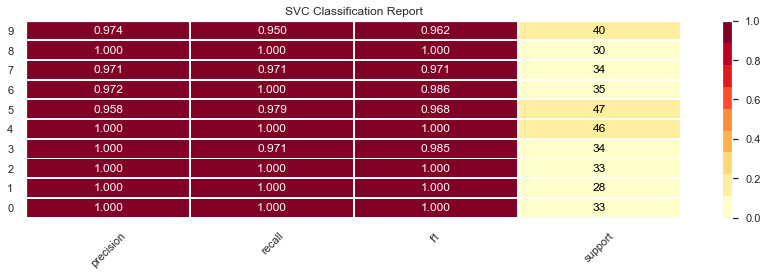

In [145]:
import yellowbrick as yb
plt.figure(figsize=(12,4))
visualizer = yb.classifier.classification_report(rbf_model, X_train, y_train, X_test, y_test, support=True)
visualizer.show()
plt.show()

## Linear Kernal

In [119]:
linear_model = SVC(kernel='linear',C=0.001,probability=True)
linear_model.fit(X_train,y_train)

SVC(C=0.001, kernel='linear', probability=True)

In [120]:
linear_model.score(X_test,y_test)

0.9805555555555555

In [121]:
y_pred=linear_model.predict(X_test)

In [122]:
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline

print(accuracy_score(y_test, y_pred))

0.9805555555555555


In [123]:
print(recall_score(y_test, y_pred,average=None))

[1.         1.         1.         1.         1.         0.9787234
 0.97142857 0.97058824 0.93333333 0.95      ]


In [124]:
print(precision_score(y_test, y_pred,average=None))

[0.97058824 1.         1.         1.         1.         0.9787234
 0.97142857 1.         0.93333333 0.95      ]


## ROC Curve

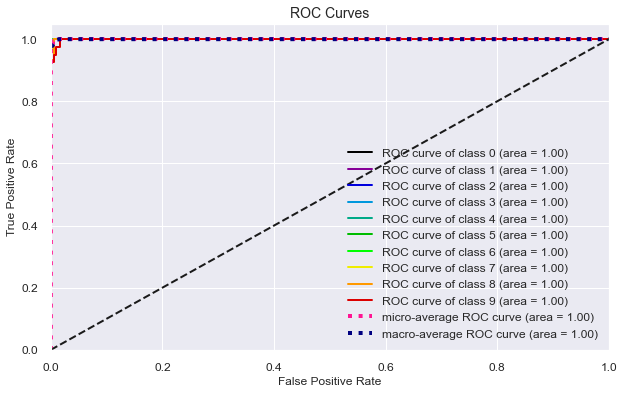

In [125]:
y_probas = linear_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Precision Recall Curve

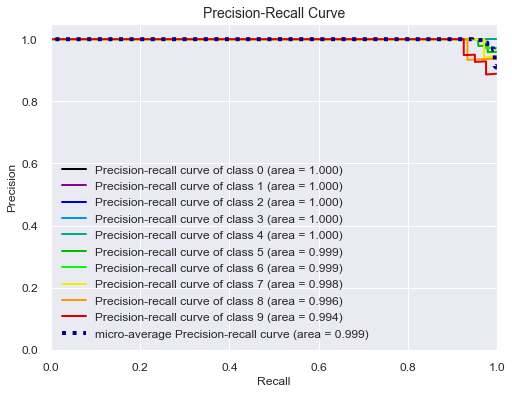

In [126]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(8,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Learning Curve

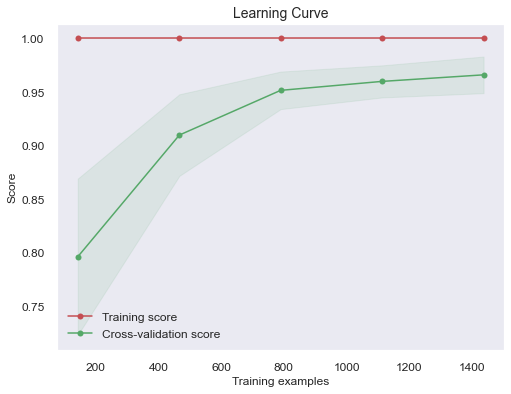

In [127]:
skplt.estimators.plot_learning_curve(rbf_model, X,y,figsize=(8,6),title_fontsize=14,text_fontsize=12)
plt.show()

## Confusion Matrix

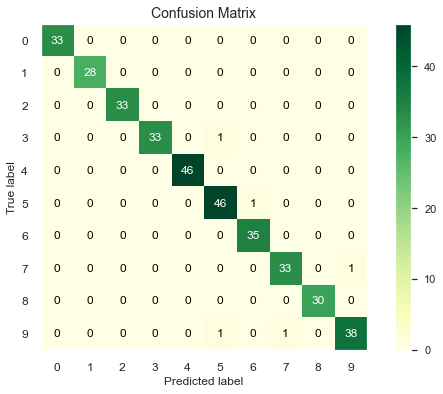

In [147]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.YlGn)
plt.show()

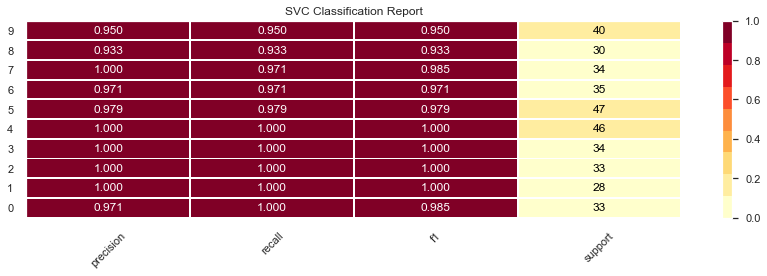

In [131]:
import yellowbrick as yb
plt.figure(figsize=(12,4))
visualizer = yb.classifier.classification_report(linear_model, X_train, y_train, X_test, y_test, support=True)
visualizer.show()
plt.show()